# NOYCE Internship Paper Visual Plot

In [1]:
# importing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from copy import deepcopy
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading dataset
student_data = pd.read_csv('Noyce_data.csv', index_col=False)

In [3]:
student_data

,Student,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12
0,S1,4.0,3.3,3.3,3.7,4.3,3.0,2.7,3.3,3.0,4.5,3.5,4.5
1,S2,4.0,3.5,5.0,4.0,4.0,3.5,4.0,4.0,3.5,4.5,4.0,3.5
2,S3,4.3,4.0,3.7,4.3,4.3,3.7,4.3,4.5,4.0,5.0,4.5,4.0
3,S4,4.0,4.0,4.0,4.0,4.0,4.0,3.5,4.0,3.5,4.0,5.0,4.0
4,S5,4.0,4.3,4.0,4.0,4.3,4.3,4.0,4.0,4.0,4.3,4.5,4.0
5,S6,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.5,4.0,4.0
6,S7,4.3,4.0,4.3,4.3,4.7,4.7,4.0,4.7,4.0,4.3,4.3,5.0
7,S8,3.7,4.0,3.3,4.3,4.0,3.0,3.3,3.7,3.3,4.3,3.7,4.0
8,S9,4.5,4.0,4.5,4.5,4.5,4.5,4.5,4.0,4.0,4.5,5.0,4.0
9,S10,4.0,4.0,4.0,4.0,4.5,4.0,4.0,4.0,4.0,3.5,4.0,4.0


In [4]:
# Strip whitespace from column names
student_data.columns = student_data.columns.str.strip()

# Strip whitespace from each cell in the dataframe
#stripped_student_data = student_data.applymap(lambda x: x.strip() if isinstance(x, str) else x)
student_data.applymap(lambda x: x.strip() if isinstance(x, str) else x)

,Student,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12
0,S1,4.0,3.3,3.3,3.7,4.3,3.0,2.7,3.3,3.0,4.5,3.5,4.5
1,S2,4.0,3.5,5.0,4.0,4.0,3.5,4.0,4.0,3.5,4.5,4.0,3.5
2,S3,4.3,4.0,3.7,4.3,4.3,3.7,4.3,4.5,4.0,5.0,4.5,4.0
3,S4,4.0,4.0,4.0,4.0,4.0,4.0,3.5,4.0,3.5,4.0,5.0,4.0
4,S5,4.0,4.3,4.0,4.0,4.3,4.3,4.0,4.0,4.0,4.3,4.5,4.0
5,S6,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.5,4.0,4.0
6,S7,4.3,4.0,4.3,4.3,4.7,4.7,4.0,4.7,4.0,4.3,4.3,5.0
7,S8,3.7,4.0,3.3,4.3,4.0,3.0,3.3,3.7,3.3,4.3,3.7,4.0
8,S9,4.5,4.0,4.5,4.5,4.5,4.5,4.5,4.0,4.0,4.5,5.0,4.0
9,S10,4.0,4.0,4.0,4.0,4.5,4.0,4.0,4.0,4.0,3.5,4.0,4.0


In [5]:
student_data.columns

Index(['Student', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10',
       'Q11', 'Q12'],
      dtype='object')

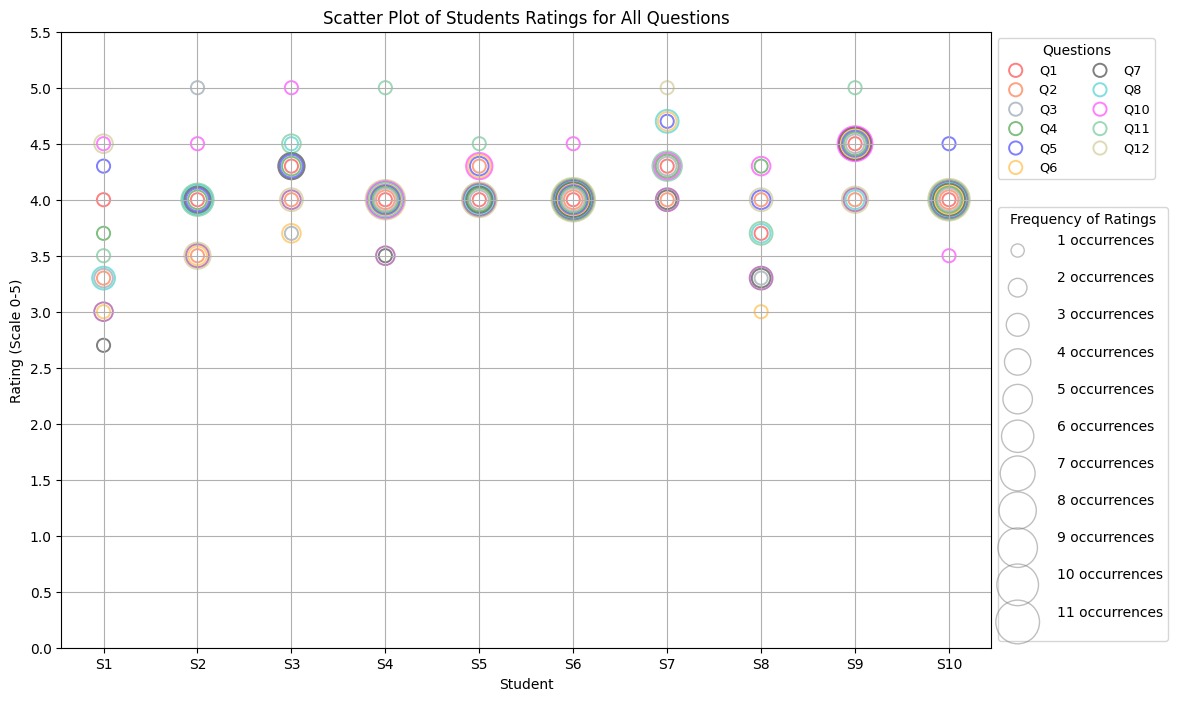

In [88]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load the dataset from the uploaded CSV file
student_data = pd.read_csv('Noyce_data.csv')

# Function to assign color to each question
def question_color(ques_column_name):
    color_dict = {
        'Q1': 'red', 'Q2': 'orangered', 'Q3': 'slategray', 'Q4': 'green', 'Q5': 'blue',
        'Q6': 'orange', 'Q7': 'black', 'Q8': 'c', 'Q9': 'purple', 'Q10': 'magenta',
        'Q11': 'mediumseagreen', 'Q12': 'darkkhaki'
    }
    return color_dict.get(ques_column_name, 'orangered')

# Base size for all questions
base_size = 90

# Adjusting the plot to use the same base size for all questions but vary size by frequency of occurrence
plt.figure(figsize=(12, 8))

# Initialize a dictionary to store frequency counts for stacking sizes
frequency_dict = {}

for question in student_data.columns[1:]:
    for idx, student in enumerate(student_data['Student ']):
        rating = student_data.loc[student_data['Student '] == student, question].item()
        key = (idx, rating)
        if key not in frequency_dict:
            frequency_dict[key] = 0
        frequency_dict[key] += 1
        size = base_size * frequency_dict[key]  # Scale size based on frequency of this rating for this student
        plt.scatter([idx], [rating], s=size, facecolors='none', edgecolors=question_color(question), alpha=0.5, linewidth=1.40, label=question if frequency_dict[key] == 1 else "", marker='o')

# Create and adjust legends and labels
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
legend1 = plt.legend(by_label.values(), by_label.keys(), loc='upper left', bbox_to_anchor=(1, 1), fontsize=9.25, ncol=2, title="Questions")
plt.gca().add_artist(legend1)  # Re-add the first legend

handles_sizes = [plt.scatter([], [], s=base_size*(i+1), facecolors='none', edgecolors='gray', alpha=0.5) for i in range(11)]
labels_sizes = [f'{i+1} occurrences\n' for i in range(11)]
legend2 = plt.legend(handles_sizes, labels_sizes, title="Frequency of Ratings", loc='lower left', fontsize=10, handletextpad=1.8, bbox_to_anchor=(1, 0))

# Set plot details
plt.xlabel('Student')
plt.ylabel('Rating (Scale 0-5)')
plt.title('Scatter Plot of Students Ratings for All Questions')
plt.yticks(np.arange(0, 6, 0.5))
plt.xticks(ticks=np.arange(len(student_data['Student '])), labels=student_data['Student '])
plt.grid(True)

plt.show()

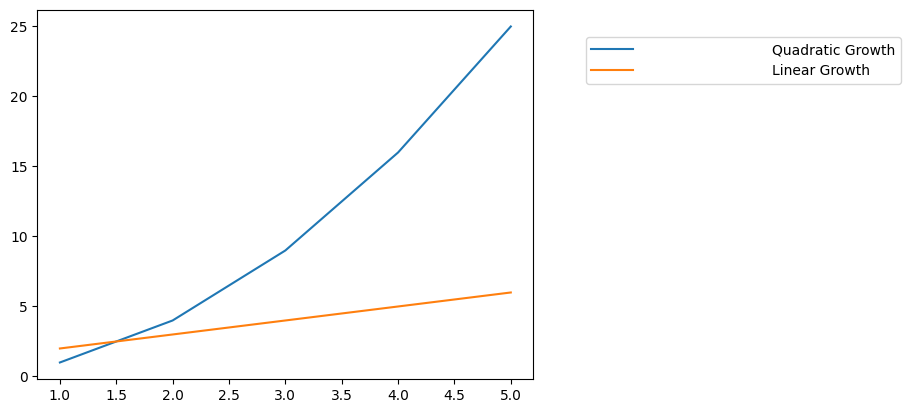

In [81]:
# Sample data
x = [1, 2, 3, 4, 5]
y1 = [1, 4, 9, 16, 25]
y2 = [2, 3, 4, 5, 6]

# Plotting the data
plt.plot(x, y1, label='Quadratic Growth')
plt.plot(x, y2, label='Linear Growth')

# Adding a legend
plt.legend(
    loc='upper left',
    bbox_to_anchor=(1.05, 1),  # Position the legend outside the plot area
    fontsize=10,
    borderaxespad=2,  # Padding between the axes and legend box
    handlelength=3,  # Length of the legend handles
    handletextpad=10,  # Padding between the legend handles and text
)

# Display the plot
plt.show()

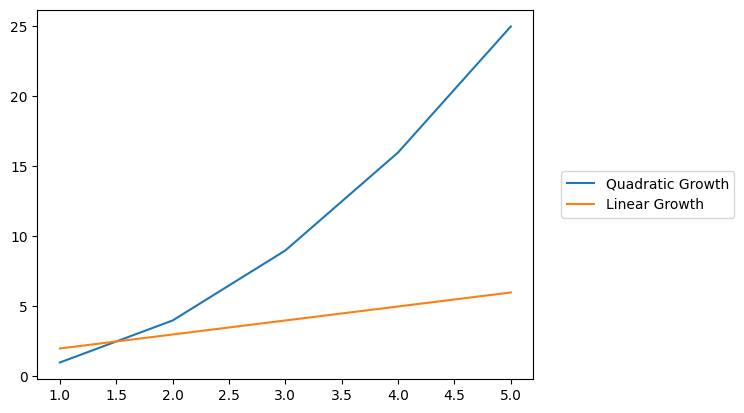

In [32]:
# Sample data
x = [1, 2, 3, 4, 5]
y1 = [1, 4, 9, 16, 25]
y2 = [2, 3, 4, 5, 6]

# Plotting the data
plt.plot(x, y1, label='Quadratic Growth')
plt.plot(x, y2, label='Linear Growth')

# Adding a legend
plt.legend(
    loc='center left',
    bbox_to_anchor=(1, 0.5),  # Position the legend to the right, centered vertically
    fontsize=10,
    borderaxespad=2,  # Padding between the axes and legend box
    markerscale=2,  # Scale the marker size in the legend
    frameon=True  # Enable the legend frame
)

# Display the plot
plt.show()

### Current Version of my Code which I'm actively working on

This is sizes global [1]
This is color_of_ques ['red']
This is student data 0     S1
1     S2
2     S3
3     S4
4     S5
5     S6
6     S7
7     S8
8     S9
9    S10
Name: Student, dtype: object
 this is question Q1
This is student_data[question] 0    4.0
1    4.0
2    4.3
3    4.0
4    4.0
5    4.0
6    4.3
7    3.7
8    4.5
9    4.0
Name: Q1, dtype: float64
checking what y would be ['Q1']
This is sizes global [1, 2, 3]
This is color_of_ques ['orange', 'darkgray', 'aqua']
This is student data 0     S1
1     S2
2     S3
3     S4
4     S5
5     S6
6     S7
7     S8
8     S9
9    S10
Name: Student, dtype: object
 this is question Q2
This is student_data[question] 0    3.3
1    3.5
2    4.0
3    4.0
4    4.3
5    4.0
6    4.0
7    4.0
8    4.0
9    4.0
Name: Q2, dtype: float64
checking what y would be ['Q2', 'Q2', 'Q2']


ValueError: s must be a scalar, or float array-like with the same size as x and y

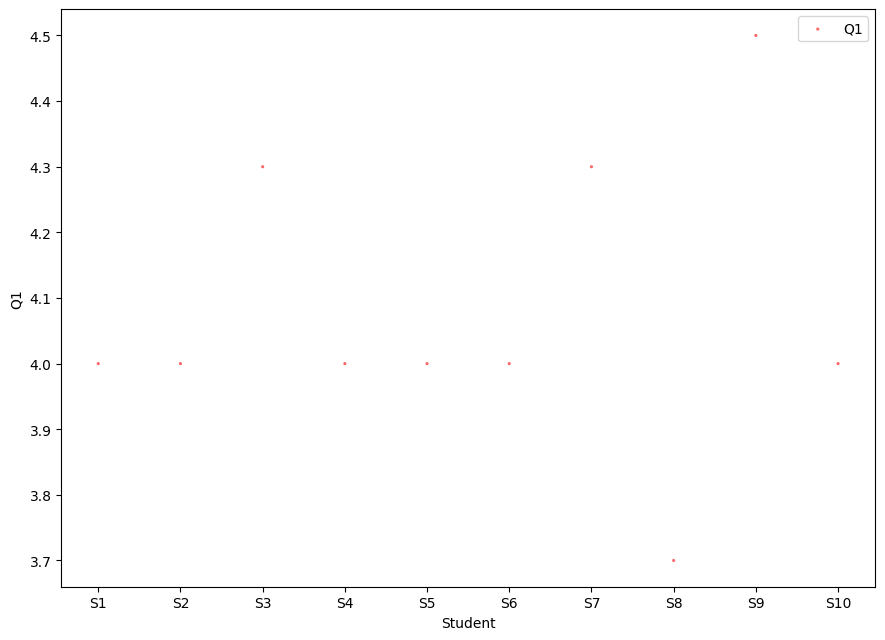

In [13]:
# creating function to place a specific color for a question
def question_color(student, question, data):
    # dictionary that assigns a color for a specific question
    color_dict = {
        'Q1': 'red', 'Q2': 'orange', 'Q3': 'darkgray', 'Q4': 'green', 'Q5': 'blue', 
        'Q6': 'y', 'Q7': 'dimgray', 'Q8': 'aqua', 'Q9': 'purple', 'Q10': 'magenta',
        'Q11': 'mediumseagreen', 'Q12': 'darkkhaki',
    }

    # filtering to get a single row for a student from the student_data dataset
    student_select = data['Student'].isin([student])
    # a single row for a student from the student_data dataset
    student_data_indiv = data[student_select]

    # looking at each question for a student and finding the ratings that match for a given question 
    student_rating_indiv = student_data_indiv.loc[student_data_indiv['Student'] == student, question].values[0]  
    # trimming the student_data dataset so it only conatins the questions where its rating matches 
    #student_data_trimmed = student_data_indiv[student_data_indiv[question] == student_rating_indiv] <-- ignore this comment
    student_data_trimmed = student_data_indiv.drop(columns=[column_name for column_name in student_data_indiv if student_data_indiv[column_name].values[0] != student_rating_indiv])

    #color_dict_trimmed = color_dict[color_dict.keys() in student_data_trimmed.columns] <-- ignore this comment
    # creating empty list where the colors that correspond to the question where their ratings match will then be appended to
    color_list = []
    for question_id in student_data_trimmed.columns:
        color_list.append(color_dict[question_id])
    return color_list
    # returns the color associated with a given question <-- ignore comment
    # If the ques_column_name exists in color_dict, it returns the corresponding color, if it does not exist then returns black <-- ignore comment
    #return color_dict.get(ques_column_name, 'black') <-- ignore comment 


# creating a fuction to get the size of a datapoint based on frequency
def get_point_size_based_on_frequency(student, question, data):
    # imprting copy in order to create a deep copy
    #variable = frequency_size_list.copy().copy() <-- ignore comment
    import copy
    # creating a variable that we will cut down everytime we run the loop. will start with 12 entries (corresponding to 12 questions). then run the frequency function. the size of the list will decrease to the size that is relavent to the frequency
    variable = copy.copy(frequency_size_list)
    # The rating for the given student for a particular question is retrieved from the dataset <-- ignore comment 
    #student_rating = data.loc[data['Student'] == student, question].values[0] <-- ignore comment 
    
    # filtering to get a single row for a student
    student_select = data['Student'].isin([student])
    # a single row for a student
    student_data_indiv = data[student_select]

    # looking at each question for a student and finding the rating that match for a given question 
    student_rating_indiv = student_data_indiv.loc[student_data_indiv['Student'] == student, question].values[0]  
    # trimming the student_data dataset so it only conatins the questions where its rating matches 
    #student_data_trimmed = student_data_indiv[student_data_indiv[question] == student_rating_indiv] <-- ignore comment
    student_data_trimmed = student_data_indiv.drop(columns=[column_name for column_name in student_data_indiv if student_data_indiv[column_name].values[0] != student_rating_indiv])

    # Calculate the frequency where the ratings match for a given question or questions
    #frequency = sum(data[question] == student_rating) <-- ignore comment
    frequency = len(student_data_trimmed.columns)

    # calculate the size of the datapoint based on the frequency (which is based on the list that was cut to the number of relavent questiosn whose ratings matched)
    sizes_local = variable[:frequency]
    # return the size
    return sizes_local

# creating a list where the entries are the different sizes assocaited with a particular frequency
frequency_size_list = [1,2,3,4,5,6,7,8,9,10,11,12]

# nesting of for loop bc different students have different frueqncies for different questions
for student in student_data['Student']:
    # setting up size of the plot
    plt.figure(figsize=(10.5, 7.5))
    
    # the first column is ignored because it contains the students
    for question in student_data.columns[1:]:
        # calculate the size of the datapoint based on the frequency (which is based on the list that was cut to the number of relavent questiosn whose ratings matched)
        sizes_global = get_point_size_based_on_frequency(student, question, student_data)
        # find the color of the datapoint for the relavent question
        color_of_ques = question_color(student, question, student_data)

        print(f'This is sizes global {sizes_global}')
        print(f'This is color_of_ques {color_of_ques}')
        print('This is student data', student_data['Student'])
        print(f' this is question {question}')
        print('This is student_data[question]', student_data[question])
        print('checking what y would be', [question] * len(sizes_global))

        # Creating a scatter plot for each question
        sns.scatterplot(x=student_data['Student'], y=question, data=student_data, edgecolor=color_of_ques, facecolor='none', 
                        s=sizes_global, label=question, alpha=0.6, linewidth=1.25)

# setting major ticks for y-axis
plt.yticks([0.00, 0.25, 0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 2.00, 2.25, 2.50, 2.75, 3.00, 3.25, 3.50, 3.75, 4.00, 4.25, 4.50, 4.75, 5.00], ['0.00', '0.25', '0.50', '0.75', '1.00', '1.25', '1.50', '1.75', '2.00', '2.25', '2.50', '2.75', '3.00', '3.25', '3.50', '3.75', '4.00', '4.25', '4.50', '4.75', '5.00'])

# Add labels and title
plt.xlabel('Student')
plt.ylabel('Rating (Scale 0-5)')

plt.title('Scatter Plot of Students Ratings for All Questions')

# Adjusting legend
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

plt.show()

In [ ]:
# creating function to place a specific color for a question
def question_color(student, question, data):
    # dictionary that assigns a color for a specific question
    color_dict = {
        'Q1': 'red', 'Q2': 'orange', 'Q3': 'darkgray', 'Q4': 'green', 'Q5': 'blue', 
        'Q6': 'y', 'Q7': 'dimgray', 'Q8': 'aqua', 'Q9': 'purple', 'Q10': 'magenta',
        'Q11': 'mediumseagreen', 'Q12': 'darkkhaki',
    }

    # filtering to get a single row for a student from the student_data dataset
    student_select = data['Student'].isin([student])
    # a single row for a student from the student_data dataset
    student_data_indiv = data[student_select]

    # looking at each question for a student and finding the ratings that match for a given question 
    student_rating_indiv = student_data_indiv.loc[student_data_indiv['Student'] == student, question].values[0]  
    # trimming the student_data dataset so it only conatins the questions where its rating matches 
    student_data_trimmed = student_data_indiv.drop(columns=[column_name for column_name in student_data_indiv if student_data_indiv[column_name].values[0] != student_rating_indiv])

    # creating empty list where the colors that correspond to the question where their ratings match will then be appended to
    color_list = []
    for question_id in student_data_trimmed.columns:
        color_list.append(color_dict[question_id])
    return color_list


# creating a fuction to get the size of a datapoint based on frequency
def get_point_size_based_on_frequency(student, question, data):
    # imprting copy in order to create a deep copy
    import copy
    # creating a variable that we will cut down everytime we run the loop. will start with 12 entries (corresponding to 12 questions). then run the frequency function. the size of the list will decrease to the size that is relavent to the frequency
    variable = copy.copy(frequency_size_list)
    
    # filtering to get a single row for a student
    student_select = data['Student'].isin([student])
    # a single row for a student
    student_data_indiv = data[student_select]

    # looking at each question for a student and finding the rating that match for a given question 
    student_rating_indiv = student_data_indiv.loc[student_data_indiv['Student'] == student, question].values[0]  
    # trimming the student_data dataset so it only conatins the questions where its rating matches 
    student_data_trimmed = student_data_indiv.drop(columns=[column_name for column_name in student_data_indiv if student_data_indiv[column_name].values[0] != student_rating_indiv])

    # Calculate the frequency where the ratings match for a given question or questions
    frequency = len(student_data_trimmed.columns)

    # calculate the size of the datapoint based on the frequency (which is based on the list that was cut to the number of relavent questiosn whose ratings matched)
    sizes_local = variable[:frequency]
    # return the size
    return sizes_local

# we need this to turn a list-of-lists into a list containing no lists, i.e. "flattening"
from itertools import chain

# creating an empty dataset which we will be using for our scatterplot
# df_plot = pd.DataFrame()
student_ring_size_data = pd.DataFrame()

# creating a list where the entries are the different sizes assocaited with a particular frequency
frequency_size_list = [1,2,3,4,5,6,7,8,9,10,11,12]

# nesting of for loop bc different students have different frueqncies for different questions
for student in student_data['Student']: 
    # since this loop goes student-by-student, we'll construct student_ring_size_data row-by-row
    row = [] # creating empty list for row
    question_list = [] # creating empty list which serves as a temporary variable that we use to build the "questions" part of the row
    ring_list = [] # creating epty list which serves as a temporary variable that we use to build the "ring sizes" part of the row

    # the first column is ignored because it contains the students
    for question in student_data.columns[1:]:
        # calculate the size of the datapoint based on the frequency (which is based on the list that was cut to the number of relavent questiosn whose ratings matched)
        #sizes_global = get_point_size_based_on_frequency(student, question, student_data)
        # find the color of the datapoint for the relavent question
        color_of_ques = question_color(student, question, student_data)

        # ADD COMMENTS in order to get the numerical value of that question instead.
        # The idea is to get each question and its corresponding size in the same place such that we can pair them up for our scatterplot.
        question_list.append(student_data[question].values[0])
        # ADD COMMENTS
        ring_list.append(get_point_size_based_on_frequency(student, question, student_data))

    # ADD COMMENT 
    row = [[student], question_list, ring_list]
    # flatten row
    row = list(chain.from_iterable(row))

    student_ring_size_data = student_ring_size_data.append(row)  # add the row to the dataset

# setting up size of the plot
plt.figure(figsize=(10.5, 7.5))
# Creating a scatter plot for each question
sns.scatterplot(x=student_data['Student'], y=question, data=student_data, edgecolor=color_of_ques, facecolor='none', s=sizes_global, 
                label=question, alpha=0.6, linewidth=1.25)

# setting major ticks for y-axis
plt.yticks([0.00, 0.25, 0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 2.00, 2.25, 2.50, 2.75, 3.00, 3.25, 3.50, 3.75, 4.00, 4.25, 4.50, 4.75, 5.00], ['0.00', '0.25', '0.50', '0.75', '1.00', '1.25', '1.50', '1.75', '2.00', '2.25', '2.50', '2.75', '3.00', '3.25', '3.50', '3.75', '4.00', '4.25', '4.50', '4.75', '5.00'])

# Add labels and title
plt.xlabel('Student')
plt.ylabel('Rating (Scale 0-5)')

plt.title('Scatter Plot of Students Ratings for All Questions')

# Adjusting legend
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

plt.show()

In [ ]:
# creating function to place a specific color for a question
def question_color(student, question, data):
    # dictionary that assigns a color for a specific question
    color_dict = {
        'Q1': 'red', 'Q2': 'orange', 'Q3': 'darkgray', 'Q4': 'green', 'Q5': 'blue', 
        'Q6': 'y', 'Q7': 'dimgray', 'Q8': 'aqua', 'Q9': 'purple', 'Q10': 'magenta',
        'Q11': 'mediumseagreen', 'Q12': 'darkkhaki',
    }

    # filtering to get a single row for a student from the student_data dataset
    student_select = data['Student'].isin([student])
    # a single row for a student from the student_data dataset
    student_data_indiv = data[student_select]

    # looking at each question for a student and finding the ratings that match for a given question 
    student_rating_indiv = student_data_indiv.loc[student_data_indiv['Student'] == student, question].values[0]  
    # trimming the student_data dataset so it only conatins the questions where its rating matches 
    #student_data_trimmed = student_data_indiv[student_data_indiv[question] == student_rating_indiv] <-- ignore this comment
    student_data_trimmed = student_data_indiv.drop(columns=[column_name for column_name in student_data_indiv if student_data_indiv[column_name].values[0] != student_rating_indiv])

    #color_dict_trimmed = color_dict[color_dict.keys() in student_data_trimmed.columns] <-- ignore this comment
    # creating empty list where the colors that correspond to the question where their ratings match will then be appended to
    color_list = []
    for question_id in student_data_trimmed.columns:
        color_list.append(color_dict[question_id])
    return color_list
    # returns the color associated with a given question <-- ignore comment
    # If the ques_column_name exists in color_dict, it returns the corresponding color, if it does not exist then returns black <-- ignore comment
    #return color_dict.get(ques_column_name, 'black') <-- ignore comment 


# creating a fuction to get the size of a datapoint based on frequency
def get_point_size_based_on_frequency(student, question, data):
    # creating a variable that we will cut down everytime we run the loop. will start with 12 entries (corresponding to 12 questions). then run the frequency function. the size of the list will decrease to the size that is relavent to the frequency
    #variable = frequency_size_list.copy().copy() <-- ignore comment
    import copy
    variable = copy.copy(frequency_size_list)
    # The rating for the given student for a particular question is retrieved from the dataset <-- ignore comment 
    #student_rating = data.loc[data['Student'] == student, question].values[0] <-- ignore comment 
    
    # filtering to get a single row for a student
    student_select = data['Student'].isin([student])
    # a single row for a student
    student_data_indiv = data[student_select]

    # looking at each question for a student and finding the rating that match for a given question 
    student_rating_indiv = student_data_indiv.loc[student_data_indiv['Student'] == student, question].values[0]  
    # trimming the student_data dataset so it only conatins the questions where its rating matches 
    #student_data_trimmed = student_data_indiv[student_data_indiv[question] == student_rating_indiv] <-- ignore comment
    student_data_trimmed = student_data_indiv.drop(columns=[column_name for column_name in student_data_indiv if student_data_indiv[column_name].values[0] != student_rating_indiv])

    # Calculate the frequency where the ratings match for a given question or questions
    #frequency = sum(data[question] == student_rating) <-- ignore comment
    frequency = len(student_data_trimmed.columns)

    # calculate the size of the datapoint based on the frequency (which is based on the list that was cut to the number of relavent questiosn whose ratings matched)
    sizes_local = variable[:frequency]
    # return the size
    return sizes_local

# creating a list where the entries are the different sizes assocaited with a particular frequency
frequency_size_list = [1,2,3,4,5,6,7,8,9,10,11,12]

# Create an empty DataFrame for frequency sizes
frequency_size_data = pd.DataFrame(columns=['Student', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 
                                            'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11', 'R12'])

# nesting of for loop bc different students have different frueqncies for different questions
for student in student_data['Student']:
    # the first column is ignored because it contains the students
    for question in student_data.columns[1:]:
        # calculate the size of the datapoint based on the frequency (which is based on the list that was cut to the number of relavent questiosn whose ratings matched)
        sizes_global = get_point_size_based_on_frequency(student, question, student_data)
        # find the color of the datapoint for the relavent question
        color_of_ques = question_color(student, question, student_data)

        # putting our frequency size output into the empty frequency_size_data dataset which will then be merged onto our original student_data_dataset
        frequency_size_data = frequency_size_data.append({'Student': student, 'Q1':question, 'Q2':question, 'Q3':question, 'Q4':question, 
                                                          'Q5':question, 'Q6':question, 'Q7':question, 'Q8':question, 'Q9':question, 'Q10':question, 'Q11':question, 
                                                          'Q12':question, 'R1':sizes_global, 'R2':sizes_global, 'R3':sizes_global, 'R4':sizes_global, 'R5':sizes_global, 
                                                          'R6':sizes_global, 'R7':sizes_global, 'R8':sizes_global, 'R9':sizes_global, 'R10':sizes_global, 
                                                          'R11':sizes_global, 'R12':sizes_global}, ignore_index=True)
        
        # merge the frequency_size_data table onto our original student_data table
        
        '''
        import pandas as pd

        # Assuming 'student_data' is your original DataFrame
        student_data = pd.read_csv('/path/to/your/data.csv')  # Load your data

        # Create an empty DataFrame for frequencies
        frequency_data = pd.DataFrame(columns=['Student', 'Question', 'Frequency'])

        # Nested loop to calculate frequencies
        for student in student_data['Student']:
            for question in student_data.columns[1:]:
                frequency = student_data[question].value_counts().get(student_data.loc[student_data['Student'] == student, question].values[0], 0)
                frequency_data = frequency_data.append({'Student': student, 'Question': question, 'Frequency': frequency}, ignore_index=True)

        # Check the frequency data
        print(frequency_data.head())
        '''

# setting up size of the plot
plt.figure(figsize=(10.5, 7.5))
# Creating a scatter plot for each question
sns.scatterplot(x=student_data['Student'], y=question, data=student_data, edgecolor=color_of_ques, facecolor='none', s=sizes_global, 
                label=question, alpha=0.6, linewidth=1.25)

# setting major ticks for y-axis
plt.yticks([0.00, 0.25, 0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 2.00, 2.25, 2.50, 2.75, 3.00, 3.25, 3.50, 3.75, 4.00, 4.25, 4.50, 4.75, 5.00], ['0.00', '0.25', '0.50', '0.75', '1.00', '1.25', '1.50', '1.75', '2.00', '2.25', '2.50', '2.75', '3.00', '3.25', '3.50', '3.75', '4.00', '4.25', '4.50', '4.75', '5.00'])

# Add labels and title
plt.xlabel('Student')
plt.ylabel('Rating (Scale 0-5)')

plt.title('Scatter Plot of Students Ratings for All Questions')

# Adjusting legend
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

plt.show()

### Sample code

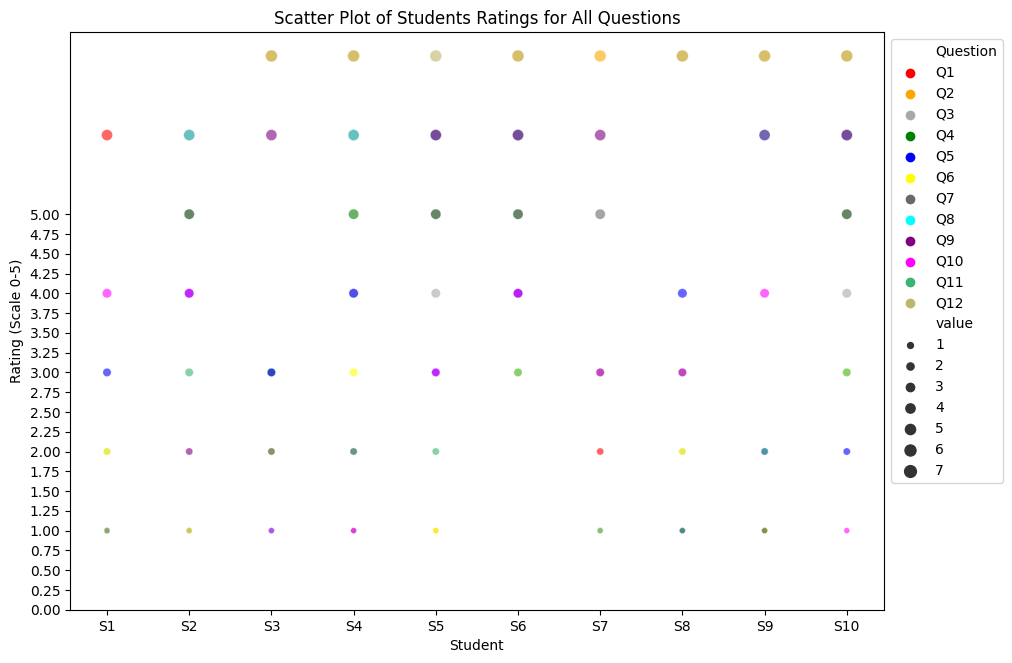

In [40]:
# Function to get color for each question
def question_color(question):
    color_dict = {
        'Q1': 'red', 'Q2': 'orange', 'Q3': 'darkgray', 'Q4': 'green', 'Q5': 'blue', 
        'Q6': 'yellow', 'Q7': 'dimgray', 'Q8': 'aqua', 'Q9': 'purple', 'Q10': 'magenta',
        'Q11': 'mediumseagreen', 'Q12': 'darkkhaki',
    }
    return color_dict.get(question, 'black')

# Function to get point size based on frequency
def get_point_size_based_on_frequency(frequency):
    frequency_size_list = [1,2,3,4,5,6,7,8,9,10,11,12]
    sizes_local = frequency_size_list[:frequency]
    return sizes_local[-1]  # Return the last size from the trimmed list

# Prepare a new DataFrame for sizes and colors
sizes_df = pd.DataFrame()
sizes_df['Student'] = student_data['Student']

# Add size columns for each question
for question in student_data.columns[1:]:
    # Get the rating for each student for the given question
    student_data[question + '_size'] = student_data.apply(
        lambda row: get_point_size_based_on_frequency(
            sum(student_data[question] == row[question])
        ), axis=1
    )
    sizes_df[question + '_size'] = student_data[question + '_size']
    sizes_df[question + '_color'] = question_color(question)

# Melting the DataFrame to long format for plotting
melted_df = pd.melt(sizes_df, id_vars=['Student'], value_vars=[col for col in sizes_df.columns if '_size' in col])
melted_df['Question'] = melted_df['variable'].str.replace('_size', '')

# Plotting
plt.figure(figsize=(10.5, 7.5))
sns.scatterplot(
    data=melted_df,
    x='Student',
    y='value',
    hue='Question',
    size='value',
    palette={q: question_color(q) for q in melted_df['Question'].unique()},
    legend='full',
    alpha=0.6,
    edgecolor='w'
)

plt.yticks([0.00, 0.25, 0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 2.00, 2.25, 2.50, 2.75, 3.00, 3.25, 3.50, 3.75, 4.00, 4.25, 4.50, 4.75, 5.00], 
           ['0.00', '0.25', '0.50', '0.75', '1.00', '1.25', '1.50', '1.75', '2.00', '2.25', '2.50', '2.75', '3.00', '3.25', '3.50', '3.75', '4.00', '4.25', '4.50', '4.75', '5.00'])
plt.xlabel('Student')
plt.ylabel('Rating (Scale 0-5)')
plt.title('Scatter Plot of Students Ratings for All Questions')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

In [46]:
#sizes_df
#sizes_df.to_csv('sizes_df.csv', index=False)

### Various Versions of my Code which did not produce the Correct Result but Provided Useful Insight

Q1
Q2
Q3
Q4
Q5
Q6
Q7
Q8
Q9
Q10
Q11
Q12


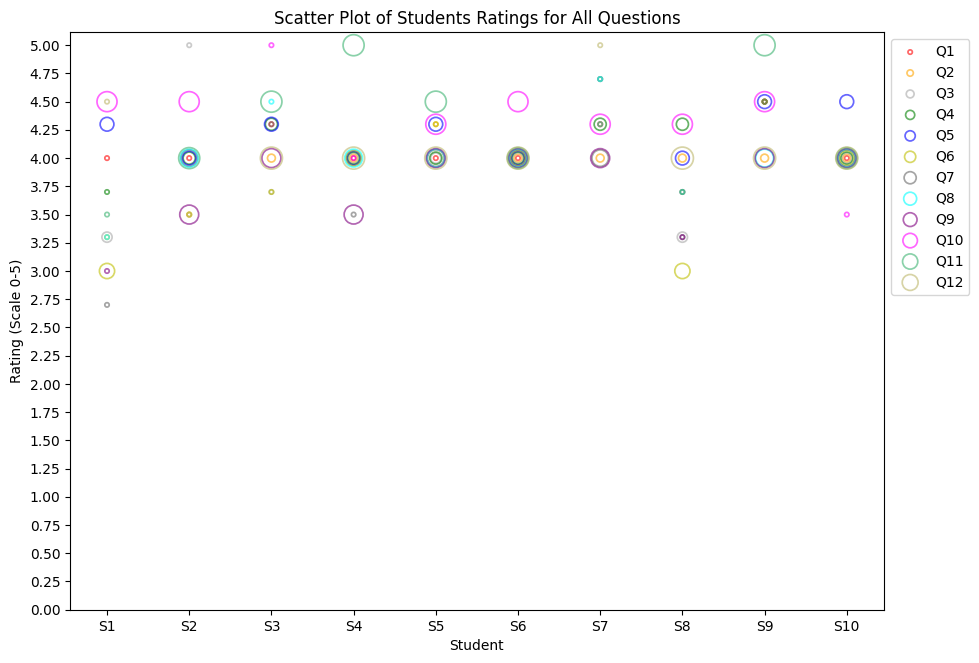

In [30]:
# Define function to determine point size
# student is the identifier for the student whose score rating (datapoint size) is being calculated
# question is reffering to the specific rating being considered for a given question
# data is referring to the dataset containing all the sata
def get_point_size(student, question, data):
    # Define a threshold to consider points as stacked (how close a point needs to be to one another to be considered as stacked)
    threshold = 0.1
    # The initial size of the point is set based on a predefined size dictionary (sizes_dict) that associates each question with a base size.
    point_size = sizes_dict[question]
    # The rating for the given student for a particular question is retrieved from the dataset
    student_rating = data.loc[data['Student'] == student, question].values[0]
    
    # Checking if there are any other points close to this point (The function iterates through all other students' ratings for the same question)
    for other_student in data['Student']:
        # if another student
        if other_student != student:
            # The rating for another student for a particular question is retrieved from the dataset
            other_student_rating = data.loc[data['Student'] == other_student, question].values[0]
            # If another student's rating is within the defined threshold of the current student's rating, the datapoints are stacked
            if abs(student_rating - other_student_rating) < threshold:
                #returns the base point_size
                return point_size
    
    # If no close points found, return a smaller size
    return min(10, point_size)

# creating function to place a specific color for a question
def question_color(ques_column_name):
    # dictionary that assigns a color for a specific question
    color_dict = {
        'Q1': 'red', 'Q2': 'orange', 'Q3': 'darkgray', 'Q4': 'green', 'Q5': 'blue', 
        'Q6': 'y', 'Q7': 'dimgray', 'Q8': 'aqua', 'Q9': 'purple', 'Q10': 'magenta',
        'Q11': 'mediumseagreen', 'Q12': 'darkkhaki',
    }
    # returns the color associated with a given question
    # If the ques_column_name exists in color_dict, it returns the corresponding color, if it does not exist then returns black
    return color_dict.get(ques_column_name, 'black')  

# Define the size increments
base_size = 10
size_increment = 22

# creating a dictionary to increase the size of the datapoint associated with each question
sizes_dict = {
    'Q1': base_size,
    'Q2': base_size + size_increment,
    'Q3': base_size + 2 * size_increment,
    'Q4': base_size + 3 * size_increment,
    'Q5': base_size + 4 * size_increment,
    'Q6': base_size + 5 * size_increment,
    'Q7': base_size + 6 * size_increment,
    'Q8': base_size + 7 * size_increment,
    'Q9': base_size + 8 * size_increment,    
    'Q10': base_size + 9 * size_increment,
    'Q11': base_size + 10 * size_increment,
    'Q12': base_size + 11 * size_increment,
} 

# Creating a scatter plot for each question
# setting up size of the plot
plt.figure(figsize=(10.5, 7.5))
for question in student_data.columns[1:]:
    sizes = [get_point_size(student, question, student_data) for student in student_data['Student']]

    print(question)

    sns.scatterplot(x=student_data['Student'], y=question, data=student_data, edgecolor=question_color(question), facecolor='none', 
                    s=sizes, label=question, alpha=0.6, linewidth=1.25)

# setting major ticks for y-axis
plt.yticks([0.00, 0.25, 0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 2.00, 2.25, 2.50, 2.75, 3.00, 3.25, 3.50, 3.75, 4.00, 4.25, 4.50, 4.75, 5.00], ['0.00', '0.25', '0.50', '0.75', '1.00', '1.25', '1.50', '1.75', '2.00', '2.25', '2.50', '2.75', '3.00', '3.25', '3.50', '3.75', '4.00', '4.25', '4.50', '4.75', '5.00'])

# Add labels and title
plt.xlabel('Student')
plt.ylabel('Rating (Scale 0-5)')
plt.title('Scatter Plot of Students Ratings for All Questions')

# adjusting legen
legend = plt.legend(bbox_to_anchor=(1, 1), loc = 'upper left')

plt.show()

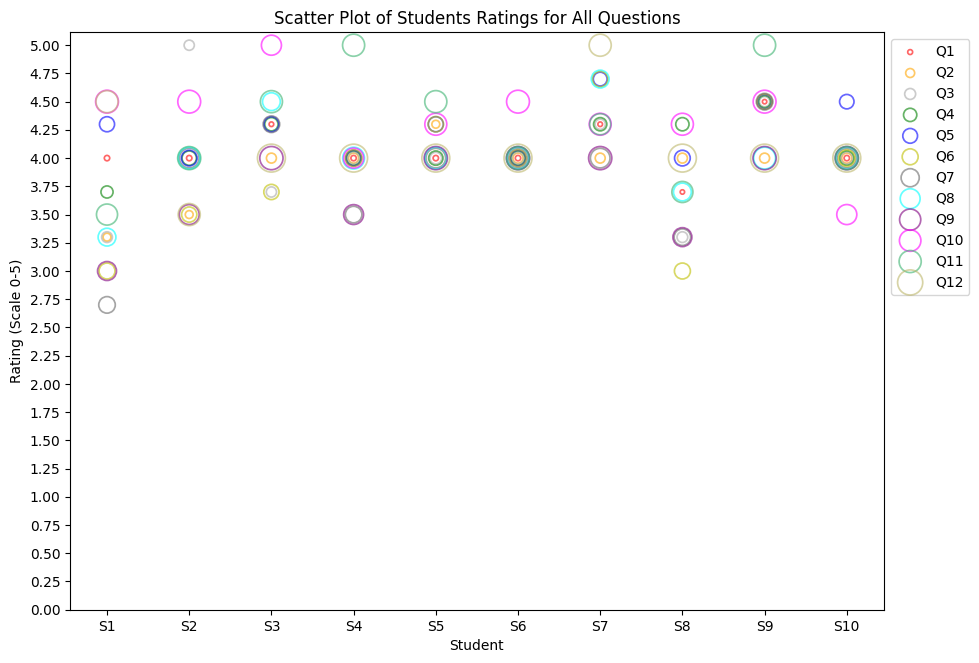

In [111]:
# MOST ACCURATE VERSION IN TERMS OF ORDER OF DATAPOINTS

# Define function to determine point size
# student is the identifier for the student whose score rating (datapoint size) is being calculated
# question is reffering to the specific rating being considered for a given question
# data is referring to the dataset containing all the sata
def get_point_size(student, question, data):
    # Define a threshold to consider points as stacked (how close a point needs to be to one another to be considered as stacked)
    threshold = 0.1
    # The initial size of the point is set based on a predefined size dictionary (sizes_dict) that associates each question with a base size.
    point_size = sizes_dict[question]
    # The rating for the given student for a particular question is retrieved from the dataset
    student_rating = data.loc[data['Student'] == student, question].values[0]
    
    # Checking if there are any other points close to this point (The function iterates through all other students' ratings for the same question)
    for other_student in data['Student']:
        # if another student
        if other_student != student:
            # The rating for another student for a particular question is retrieved from the dataset
            other_student_rating = data.loc[data['Student'] == other_student, question].values[0]
            # If another student's rating is within the defined threshold of the current student's rating, the datapoints are stacked
            if abs(student_rating - other_student_rating) < threshold:
                #returns the base point_size
                return point_size
    
    # If no close points found, return a smaller size
    return min(10, point_size)

# creating function to place a specific color for a question
def question_color(ques_column_name):
    # dictionary that assigns a color for a specific question
    color_dict = {
        'Q1': 'red', 'Q2': 'orange', 'Q3': 'darkgray', 'Q4': 'green', 'Q5': 'blue', 
        'Q6': 'y', 'Q7': 'dimgray', 'Q8': 'aqua', 'Q9': 'purple', 'Q10': 'magenta',
        'Q11': 'mediumseagreen', 'Q12': 'darkkhaki',
    }
    # returns the color associated with a given question
    # If the ques_column_name exists in color_dict, it returns the corresponding color, if it does not exist then returns black
    return color_dict.get(ques_column_name, 'black')  

# Define the size increments
base_size = 10
size_increment = 22

# creating a dictionary to increase the size of the datapoint associated with each question
sizes_dict = {
    'Q1': base_size,
    'Q2': base_size + size_increment,
    'Q3': base_size + 2 * size_increment,
    'Q4': base_size + 3 * size_increment,
    'Q5': base_size + 4 * size_increment,
    'Q6': base_size + 5 * size_increment,
    'Q7': base_size + 6 * size_increment,
    'Q8': base_size + 7 * size_increment,
    'Q9': base_size + 8 * size_increment,    
    'Q10': base_size + 9 * size_increment,
    'Q11': base_size + 10 * size_increment,
    'Q12': base_size + 11 * size_increment,
} 

# creating a fuction to get the size of a datapoint based on frequency
def get_point_size_based_on_frequency(student, question, data, sizes_dict):
    # The rating for the given student for a particular question is retrieved from the dataset
    student_rating = data.loc[data['Student'] == student, question].values[0]
    # Calculate the frequency of this rating for the specific question
    frequency = sum(data[question] == student_rating)
    # Increase the size with frequency
    return sizes_dict[question] * (1 + 0.1 * (frequency - 1))


'''
# we think the ocde may be focusing on the question paramter rather thn the score paramter
def frequency(parameters):
    for a particular student, given the question:
        if frequency == 1:
            return base size 10
        elif frequency == 2:
            return increase base size by a constant incrment
        elif etc.
        else:
            return ...
'''

# setting up size of the plot
plt.figure(figsize=(10.5, 7.5))
# for a rating given a particular question in the columns of student_data starting from the second column and continuing until the last column
# the first column is ignored because it contains the students
for question in student_data.columns[1:]:
    # student_data['Student'] retrieves the 'Student' column from the student_data dataset. This column contains the identifiers for each student
    # for student in student_data['Student' iterates over each student identifier in the 'Student' column
    # get_point_size_based_on_frequency(student, question, student_data, sizes_dict) is a function call within the List Comprehension
    # So, For each student in student_data['Student'], it calls the get_point_size_based_on_frequency 
    sizes = [get_point_size_based_on_frequency(student, question, student_data, sizes_dict) for student in student_data['Student']]
    # Creating a scatter plot for each question
    sns.scatterplot(x=student_data['Student'], y=question, data=student_data, edgecolor=question_color(question), facecolor='none', 
                    s=sizes, label=question, alpha=0.6, linewidth=1.25)

# setting major ticks for y-axis
plt.yticks([0.00, 0.25, 0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 2.00, 2.25, 2.50, 2.75, 3.00, 3.25, 3.50, 3.75, 4.00, 4.25, 4.50, 4.75, 5.00], ['0.00', '0.25', '0.50', '0.75', '1.00', '1.25', '1.50', '1.75', '2.00', '2.25', '2.50', '2.75', '3.00', '3.25', '3.50', '3.75', '4.00', '4.25', '4.50', '4.75', '5.00'])

# Add labels and title
plt.xlabel('Student')
plt.ylabel('Rating (Scale 0-5)')
plt.title('Scatter Plot of Students Ratings for All Questions')

# Adjusting legend
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

plt.show()


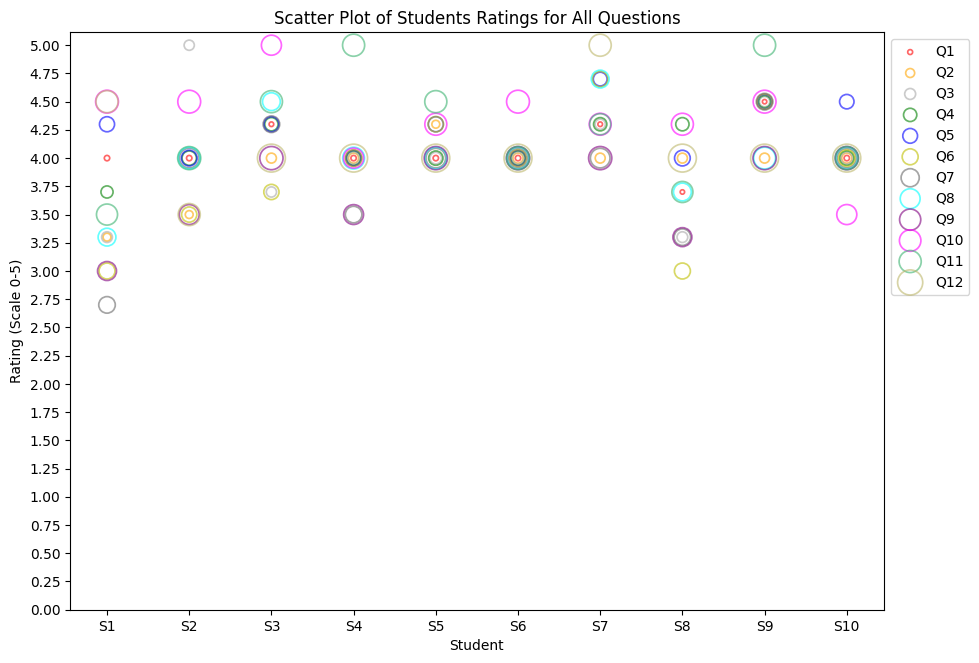

In [112]:
# creating function to place a specific color for a question
def question_color(ques_column_name):
    # dictionary that assigns a color for a specific question
    color_dict = {
        'Q1': 'red', 'Q2': 'orange', 'Q3': 'darkgray', 'Q4': 'green', 'Q5': 'blue', 
        'Q6': 'y', 'Q7': 'dimgray', 'Q8': 'aqua', 'Q9': 'purple', 'Q10': 'magenta',
        'Q11': 'mediumseagreen', 'Q12': 'darkkhaki',
    }
    # returns the color associated with a given question
    # If the ques_column_name exists in color_dict, it returns the corresponding color, if it does not exist then returns black
    return color_dict.get(ques_column_name, 'black')  


# creating a fuction to get the size of a datapoint based on frequency
def get_point_size_based_on_frequency(student, question, data):
    # The rating for the given student for a particular question is retrieved from the dataset
    student_rating = data.loc[data['Student'] == student, question].values[0]
    # Calculate the frequency of this rating for the specific question
    frequency = sum(data[question] == student_rating)
    # Increase the size with frequency
    return sizes_dict[question] * (1 + 0.1 * (frequency - 1))
    

# setting up size of the plot
plt.figure(figsize=(10.5, 7.5))
# for a rating given a particular question in the columns of student_data starting from the second column and continuing until the last column
# the first column is ignored because it contains the students
for question in student_data.columns[1:]:
    # student_data['Student'] retrieves the 'Student' column from the student_data dataset. This column contains the identifiers for each student
    # for student in student_data['Student' iterates over each student identifier in the 'Student' column
    # get_point_size_based_on_frequency(student, question, student_data, sizes_dict) is a function call within the List Comprehension
    # So, For each student in student_data['Student'], it calls the get_point_size_based_on_frequency 
    sizes = [get_point_size_based_on_frequency(student, question, student_data) for student in student_data['Student']]
    # Creating a scatter plot for each question
    sns.scatterplot(x=student_data['Student'], y=question, data=student_data, edgecolor=question_color(question), facecolor='none', 
                    s=sizes, label=question, alpha=0.6, linewidth=1.25)

# setting major ticks for y-axis
plt.yticks([0.00, 0.25, 0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 2.00, 2.25, 2.50, 2.75, 3.00, 3.25, 3.50, 3.75, 4.00, 4.25, 4.50, 4.75, 5.00], ['0.00', '0.25', '0.50', '0.75', '1.00', '1.25', '1.50', '1.75', '2.00', '2.25', '2.50', '2.75', '3.00', '3.25', '3.50', '3.75', '4.00', '4.25', '4.50', '4.75', '5.00'])

# Add labels and title
plt.xlabel('Student')
plt.ylabel('Rating (Scale 0-5)')
plt.title('Scatter Plot of Students Ratings for All Questions')

# Adjusting legend
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

plt.show()

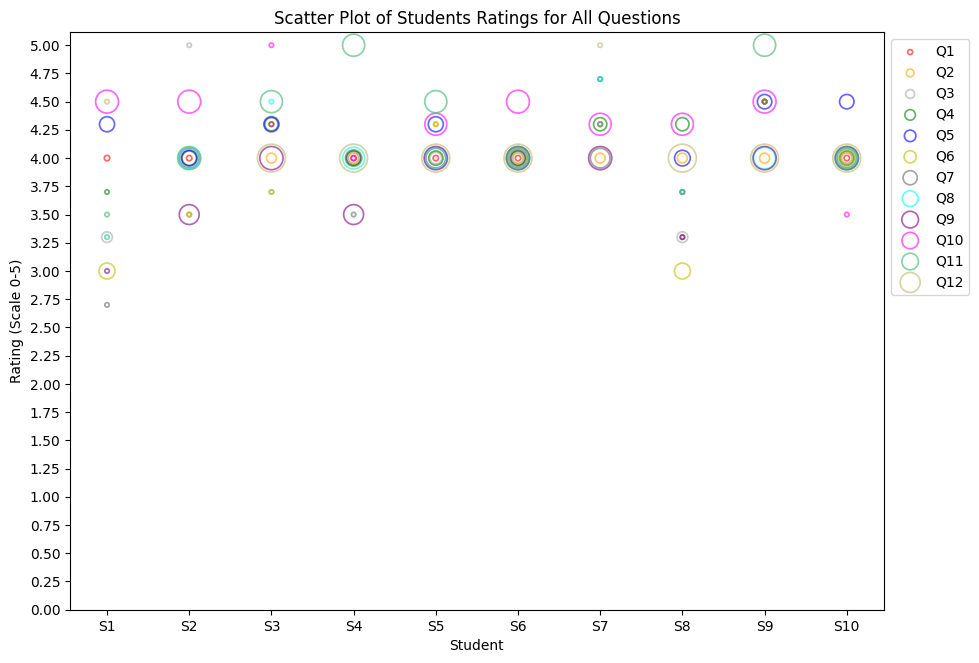

In [113]:
# creating function to place a specific color for a question
def question_color(ques_column_name):
    # dictionary that assigns a color for a specific question
    color_dict = {
        'Q1': 'red', 'Q2': 'orange', 'Q3': 'darkgray', 'Q4': 'green', 'Q5': 'blue', 
        'Q6': 'y', 'Q7': 'dimgray', 'Q8': 'aqua', 'Q9': 'purple', 'Q10': 'magenta',
        'Q11': 'mediumseagreen', 'Q12': 'darkkhaki',
    }
    # returns the color associated with a given question
    # If the ques_column_name exists in color_dict, it returns the corresponding color, if it does not exist then returns black
    return color_dict.get(ques_column_name, 'black')  


# creating a fuction to get the size of a datapoint based on frequency
def get_point_size_based_on_frequency(student, question, data):
    # The rating for the given student for a particular question is retrieved from the dataset
    student_rating = data.loc[data['Student'] == student, question].values[0]
    # Calculate the frequency of this rating for the specific question
    frequency = sum(data[question] == student_rating)

    # Manually setting the size for datapoints depending on if the datapoints are stacked or not
    if frequency == 1: # if the frequency is 1 (it means no other points are stacked on top of each other) set the size to 10 
        return 10
    else:
        # Increase the size with frequency
        return sizes_dict[question] * (1 + 0.1 * (frequency - 1))
    

# setting up size of the plot
plt.figure(figsize=(10.5, 7.5))
# for a rating given a particular question in the columns of student_data starting from the second column and continuing until the last column
# the first column is ignored because it contains the students
for question in student_data.columns[1:]:
    # student_data['Student'] retrieves the 'Student' column from the student_data dataset. This column contains the identifiers for each student
    # for student in student_data['Student' iterates over each student identifier in the 'Student' column
    # get_point_size_based_on_frequency(student, question, student_data, sizes_dict) is a function call within the List Comprehension
    # So, For each student in student_data['Student'], it calls the get_point_size_based_on_frequency 
    sizes = [get_point_size_based_on_frequency(student, question, student_data) for student in student_data['Student']]
    # Creating a scatter plot for each question
    sns.scatterplot(x=student_data['Student'], y=question, data=student_data, edgecolor=question_color(question), facecolor='none', 
                    s=sizes, label=question, alpha=0.6, linewidth=1.25)

# setting major ticks for y-axis
plt.yticks([0.00, 0.25, 0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 2.00, 2.25, 2.50, 2.75, 3.00, 3.25, 3.50, 3.75, 4.00, 4.25, 4.50, 4.75, 5.00], ['0.00', '0.25', '0.50', '0.75', '1.00', '1.25', '1.50', '1.75', '2.00', '2.25', '2.50', '2.75', '3.00', '3.25', '3.50', '3.75', '4.00', '4.25', '4.50', '4.75', '5.00'])

# Add labels and title
plt.xlabel('Student')
plt.ylabel('Rating (Scale 0-5)')
plt.title('Scatter Plot of Students Ratings for All Questions')

# Adjusting legend
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

plt.show()

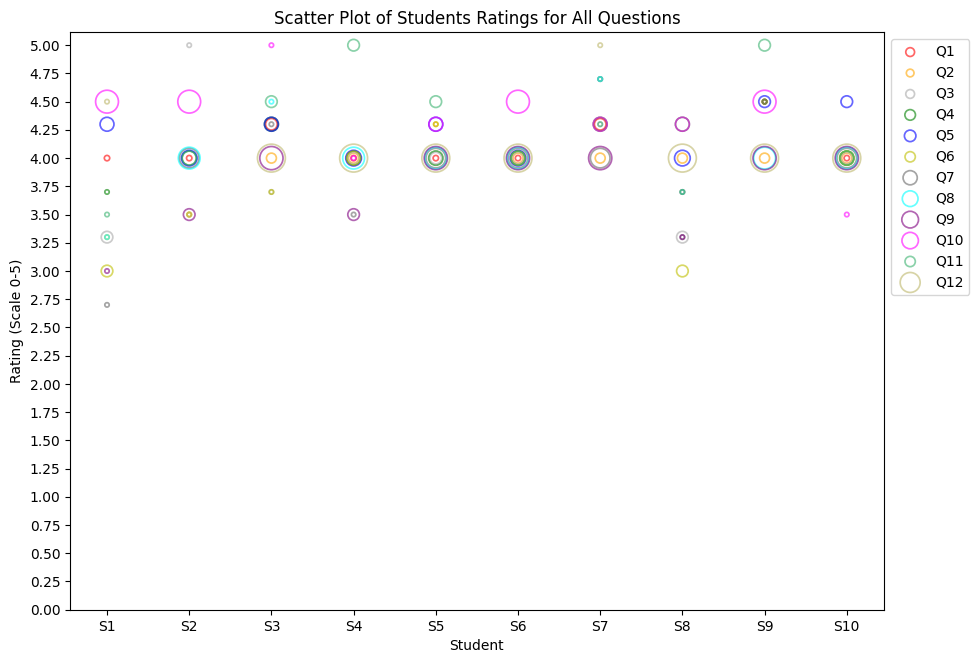

In [114]:
# MOST ACCURATE IN TERMS OF SIZE OF DATAPOINTS

# creating function to place a specific color for a question
def question_color(ques_column_name):
    # dictionary that assigns a color for a specific question
    color_dict = {
        'Q1': 'red', 'Q2': 'orange', 'Q3': 'darkgray', 'Q4': 'green', 'Q5': 'blue', 
        'Q6': 'y', 'Q7': 'dimgray', 'Q8': 'aqua', 'Q9': 'purple', 'Q10': 'magenta',
        'Q11': 'mediumseagreen', 'Q12': 'darkkhaki',
    }
    # returns the color associated with a given question
    # If the ques_column_name exists in color_dict, it returns the corresponding color, if it does not exist then returns black
    return color_dict.get(ques_column_name, 'black')  

# creating a fuction to get the size of a datapoint based on frequency
def get_point_size_based_on_frequency(student, question, data):
    # The rating for the given student for a particular question is retrieved from the dataset
    student_rating = data.loc[data['Student'] == student, question].values[0]
    # Calculate the frequency of this rating for the specific question
    frequency = sum(data[question] == student_rating)

    # Define the size increments
    base_size = 10
    size_increment = 30

    # Manually setting the size for datapoints depending on if the datapoints are stacked or not
    if frequency == 1: # if the frequency is 1 (it means no other points are stacked on top of each other) set the size to 10 
        return base_size
    elif frequency == 2:
        return base_size + 2 * size_increment
    elif frequency == 3:
        return base_size + 3 * size_increment
    else:
        return sizes_dict[question] * (1 + 0.1 * (frequency - 1)) # Increase the size with frequency
    

# setting up size of the plot
plt.figure(figsize=(10.5, 7.5))
# for a rating given a particular question in the columns of student_data starting from the second column and continuing until the last column
# the first column is ignored because it contains the students
for question in student_data.columns[1:]:
    # student_data['Student'] retrieves the 'Student' column from the student_data dataset. This column contains the identifiers for each student
    # for student in student_data['Student' iterates over each student identifier in the 'Student' column
    # get_point_size_based_on_frequency(student, question, student_data, sizes_dict) is a function call within the List Comprehension
    # So, For each student in student_data['Student'], it calls the get_point_size_based_on_frequency 
    sizes = [get_point_size_based_on_frequency(student, question, student_data) for student in student_data['Student']]
    # Creating a scatter plot for each question
    sns.scatterplot(x=student_data['Student'], y=question, data=student_data, edgecolor=question_color(question), facecolor='none', 
                    s=sizes, label=question, alpha=0.6, linewidth=1.25)

# setting major ticks for y-axis
plt.yticks([0.00, 0.25, 0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 2.00, 2.25, 2.50, 2.75, 3.00, 3.25, 3.50, 3.75, 4.00, 4.25, 4.50, 4.75, 5.00], ['0.00', '0.25', '0.50', '0.75', '1.00', '1.25', '1.50', '1.75', '2.00', '2.25', '2.50', '2.75', '3.00', '3.25', '3.50', '3.75', '4.00', '4.25', '4.50', '4.75', '5.00'])

# Add labels and title
plt.xlabel('Student')
plt.ylabel('Rating (Scale 0-5)')
plt.title('Scatter Plot of Students Ratings for All Questions')

# Adjusting legend
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

plt.show()

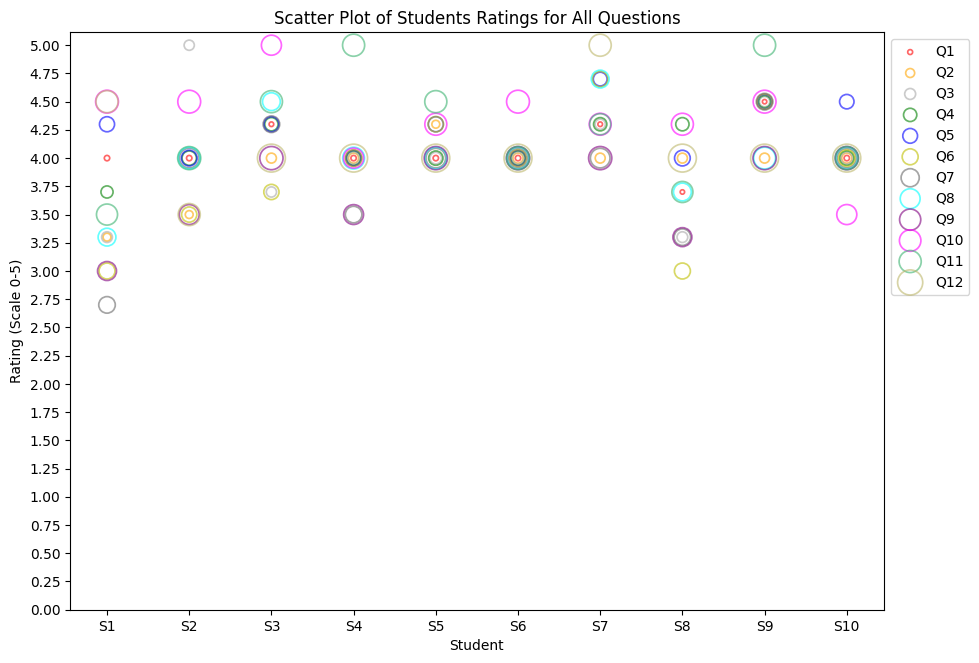

In [115]:
# creating function to place a specific color for a question
def question_color(ques_column_name):
    # dictionary that assigns a color for a specific question
    color_dict = {
        'Q1': 'red', 'Q2': 'orange', 'Q3': 'darkgray', 'Q4': 'green', 'Q5': 'blue', 
        'Q6': 'y', 'Q7': 'dimgray', 'Q8': 'aqua', 'Q9': 'purple', 'Q10': 'magenta',
        'Q11': 'mediumseagreen', 'Q12': 'darkkhaki',
    }
    # returns the color associated with a given question
    # If the ques_column_name exists in color_dict, it returns the corresponding color, if it does not exist then returns black
    return color_dict.get(ques_column_name, 'black')  

# Define the size increments
base_size = 10
size_increment = 22

# creating a dictionary to increase the size of the datapoint associated with each question
sizes_dict = {
    'Q1': base_size,
    'Q2': base_size + size_increment,
    'Q3': base_size + 2 * size_increment,
    'Q4': base_size + 3 * size_increment,
    'Q5': base_size + 4 * size_increment,
    'Q6': base_size + 5 * size_increment,
    'Q7': base_size + 6 * size_increment,
    'Q8': base_size + 7 * size_increment,
    'Q9': base_size + 8 * size_increment,    
    'Q10': base_size + 9 * size_increment,
    'Q11': base_size + 10 * size_increment,
    'Q12': base_size + 11 * size_increment,
} 

# creating a fuction to get the size of a datapoint based on frequency
def get_point_size_based_on_frequency(student, question, data, sizes_dict):
    # The rating for the given student for a particular question is retrieved from the dataset
    student_rating = data.loc[data['Student'] == student, question].values[0]
    # Calculate the frequency of this rating for the specific question
    frequency = sum(data[question] == student_rating)
    # sizes_dict[question] retrieves the base size for the given question from the sizes_dict dictionary.
    # (frequency - 1) calculate how much the size should increase beyond the base size. If the frequency is 1, frequency - 1 is 0, 
    # so there is no increment. For higher frequencies, it determines the number of increments.
    # 0.1 * (frequency - 1) multiplies the adjusted frequency (frequency - 1) by a constant factor (0.1). 
    # This factor represents the rate at which the size increases relative to the base size.
    # 1 + 0.1 * (frequency - 1) adds 1 to the proportional increase to get the multiplier. This multiplier scales the base size according to the frequency.
    return sizes_dict[question] * (1 + 0.1 * (frequency - 1)) # Increase the size with frequency


'''
# we think the ocde may be focusing on the question paramter rather than the score parameter
def frequency(parameters):
    for a particular student, given the question:
        if frequency == 1:
            return base size 10
        else:
            return increase base size by a constant incrment
'''

# setting up size of the plot
plt.figure(figsize=(10.5, 7.5))
# for a rating given a particular question in the columns of student_data starting from the second column and continuing until the last column
# the first column is ignored because it contains the students
for question in student_data.columns[1:]:
    # student_data['Student'] retrieves the 'Student' column from the student_data dataset. This column contains the identifiers for each student
    # for student in student_data['Student' iterates over each student identifier in the 'Student' column
    # get_point_size_based_on_frequency(student, question, student_data, sizes_dict) is a function call within the List Comprehension
    # So, For each student in student_data['Student'], it calls the get_point_size_based_on_frequency 
    sizes = [get_point_size_based_on_frequency(student, question, student_data, sizes_dict) for student in student_data['Student']]
    # Creating a scatter plot for each question
    sns.scatterplot(x=student_data['Student'], y=question, data=student_data, edgecolor=question_color(question), facecolor='none', 
                    s=sizes, label=question, alpha=0.6, linewidth=1.25)

# setting major ticks for y-axis
plt.yticks([0.00, 0.25, 0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 2.00, 2.25, 2.50, 2.75, 3.00, 3.25, 3.50, 3.75, 4.00, 4.25, 4.50, 4.75, 5.00], ['0.00', '0.25', '0.50', '0.75', '1.00', '1.25', '1.50', '1.75', '2.00', '2.25', '2.50', '2.75', '3.00', '3.25', '3.50', '3.75', '4.00', '4.25', '4.50', '4.75', '5.00'])

# Add labels and title
plt.xlabel('Student')
plt.ylabel('Rating (Scale 0-5)')

plt.title('Scatter Plot of Students Ratings for All Questions')

# Adjusting legend
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

plt.show()

In [ ]:
'''
# we need to incorporate the second legend ike jordan has
# the first legend is simply for the color for each question
# the second is for the sizing for a given frequency
# essentially, instead of focusing on the question we must focus on the sizing/freuncy as the parameter 
# rather than using incremtnation we should set a fixed size for the given fruency and call that frequeny. while making sure to order the rings where
the smallest ring in the middle is first occurance and additona rings in inrasing size is stacked on top 
# use if-then conditionals and incriments only for getting the intial size of the rangs/datapoints then call this when referring to the size of the 
ring/datapoint

# creating function to place a specific color for a question
def question_color(ques_column_name):
    # dictionary that assigns a color for a specific question
    color_dict = {
        'Q1': 'red', 'Q2': 'orange', 'Q3': 'darkgray', 'Q4': 'green', 'Q5': 'blue', 
        'Q6': 'y', 'Q7': 'dimgray', 'Q8': 'aqua', 'Q9': 'purple', 'Q10': 'magenta',
        'Q11': 'mediumseagreen', 'Q12': 'darkkhaki',
    }
    # returns the color associated with a given question
    # If the ques_column_name exists in color_dict, it returns the corresponding color, if it does not exist then returns black
    return color_dict.get(ques_column_name, 'black')      

# creating a fuction to get the size of a datapoint based on frequency
def get_point_size_based_on_frequency(student, question, data):
    # creating a variable that we will cut down everytime we run the loop. will start with 12 entries. then run the freuqncy function. the size 
    of the list will decrese to the size thta is relavent to the frequency
    variable = frequency_size_list.copy()
    # The rating for the given student for a particular question is retrieved from the dataset
    student_rating = data.loc[data['Student'] == student, question].values[0]
    # Calculate the frequency of this rating for the specific question
    frequency = sum(data[question] == student_rating)

    sizes_local = variable.head(frequency)
    return sizes_local

frequency_size_list = [1,2,3,4,5,6,7,8,9,10,11,12]

# nesting of for loop bc different students have different frueqncies for different questions
for every student:
    # setting up size of the plot
    plt.figure(figsize=(10.5, 7.5))
    
    # the first column is ignored because it contains the students
    for question in student_data.columns[1:]:
        sizes_global = get_point_size_based_on_frequency(student, question, data)
        # Creating a scatter plot for each question
        sns.scatterplot(x=student_data['Student'], y=question, data=student_data, edgecolor=question_color(question), facecolor='none', 
                    s=sizes_global, label=question, alpha=0.6, linewidth=1.25)

'''

In [ ]:
'''
# we need to incorporate the second legend ike jordan has
# the first legend is simply for the color for each question
# the second is for the sizing for a given frequency
# essentially, instead of focusing on the question we must focus on the sizing/freuncy as the parameter 
# rather than using incremtnation we should set a fixed size for the given fruency and call that frequeny. while making sure to order the rings where
the smallest ring in the middle is first occurance and additona rings in inrasing size is stacked on top 
# use if-then conditionals and incriments only for getting the intial size of the rangs/datapoints then call this when referring to the size of the 
ring/datapoint

# creating function to place a specific color for a question
def question_color(ques_column_name):
    # dictionary that assigns a color for a specific question
    color_dict = {
        'Q1': 'red', 'Q2': 'orange', 'Q3': 'darkgray', 'Q4': 'green', 'Q5': 'blue', 
        'Q6': 'y', 'Q7': 'dimgray', 'Q8': 'aqua', 'Q9': 'purple', 'Q10': 'magenta',
        'Q11': 'mediumseagreen', 'Q12': 'darkkhaki',
    }
    # returns the color associated with a given question
    # If the ques_column_name exists in color_dict, it returns the corresponding color, if it does not exist then returns black
    return color_dict.get(ques_column_name, 'black')  

# this has to be referenced as a float later
frequency_size_dict = {
        'Q1': '1', ......
}

# nesting of for loop
for every student:
    get frequency to cut the total number of entries minus the max number of entries
    refer to frequency_size_list
'''

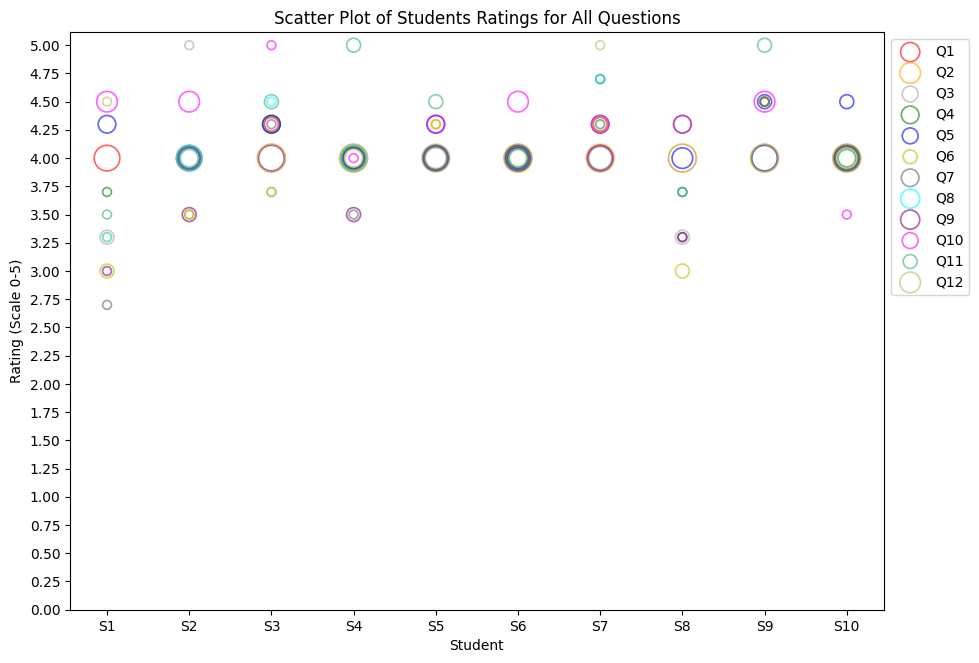

In [116]:
# Creating a function to determine point size based on frequency
def calculate_point_size(frequency, base_size=40, increment=60):
    """
    Calculate the point size based on the frequency of a student's rating.

    :param frequency: The frequency of a particular rating
    :param base_size: The base size for a point (default is 10)
    :param increment: The increment by which the size increases with frequency (default is 5)
    :return: The calculated point size
    """
    if frequency == 1:
        return base_size
    else:
        return base_size + increment * (frequency - 1)

# Create a function to get the size of a datapoint based on frequency
def get_point_size_based_on_frequency(student, question, data):
    # The rating for the given student for a particular question is retrieved from the dataset
    student_rating = data.loc[data['Student'] == student, question].values[0]
    # Calculate the frequency of this rating for the specific question
    frequency = sum(data[question] == student_rating)
    # Calculate point size using the new function
    return calculate_point_size(frequency)

# creating function to place a specific color for a question
def question_color(ques_column_name):
    # dictionary that assigns a color for a specific question
    color_dict = {
        'Q1': 'red', 'Q2': 'orange', 'Q3': 'darkgray', 'Q4': 'green', 'Q5': 'blue', 
        'Q6': 'y', 'Q7': 'dimgray', 'Q8': 'aqua', 'Q9': 'purple', 'Q10': 'magenta',
        'Q11': 'mediumseagreen', 'Q12': 'darkkhaki',
    }
    # returns the color associated with a given question
    # If the ques_column_name exists in color_dict, it returns the corresponding color, if it does not exist then returns black
    return color_dict.get(ques_column_name, 'black') 

# Setting up the size of the plot
plt.figure(figsize=(10.5, 7.5))
# For a rating given a particular question in the columns of student_data starting from the second column and continuing until the last column
# The first column is ignored because it contains the students
for question in student_data.columns[1:]:
    # student_data['Student'] retrieves the 'Student' column from the student_data dataset. This column contains the identifiers for each student
    # for student in student_data['Student' iterates over each student identifier in the 'Student' column
    # get_point_size_based_on_frequency(student, question, student_data) is a function call within the List Comprehension
    # So, For each student in student_data['Student'], it calls the get_point_size_based_on_frequency 
    sizes = [get_point_size_based_on_frequency(student, question, student_data) for student in student_data['Student']]
    # Creating a scatter plot for each question
    sns.scatterplot(x=student_data['Student'], y=question, data=student_data, edgecolor=question_color(question), facecolor='none', 
                    s=sizes, label=question, alpha=0.6, linewidth=1.25)

# Setting major ticks for y-axis
plt.yticks([0.00, 0.25, 0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 2.00, 2.25, 2.50, 2.75, 3.00, 3.25, 3.50, 3.75, 4.00, 4.25, 4.50, 4.75, 5.00], ['0.00', '0.25', '0.50', '0.75', '1.00', '1.25', '1.50', '1.75', '2.00', '2.25', '2.50', '2.75', '3.00', '3.25', '3.50', '3.75', '4.00', '4.25', '4.50', '4.75', '5.00'])

# Add labels and title
plt.xlabel('Student')
plt.ylabel('Rating (Scale 0-5)')
plt.title('Scatter Plot of Students Ratings for All Questions')

# Adjusting legend
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

plt.show()

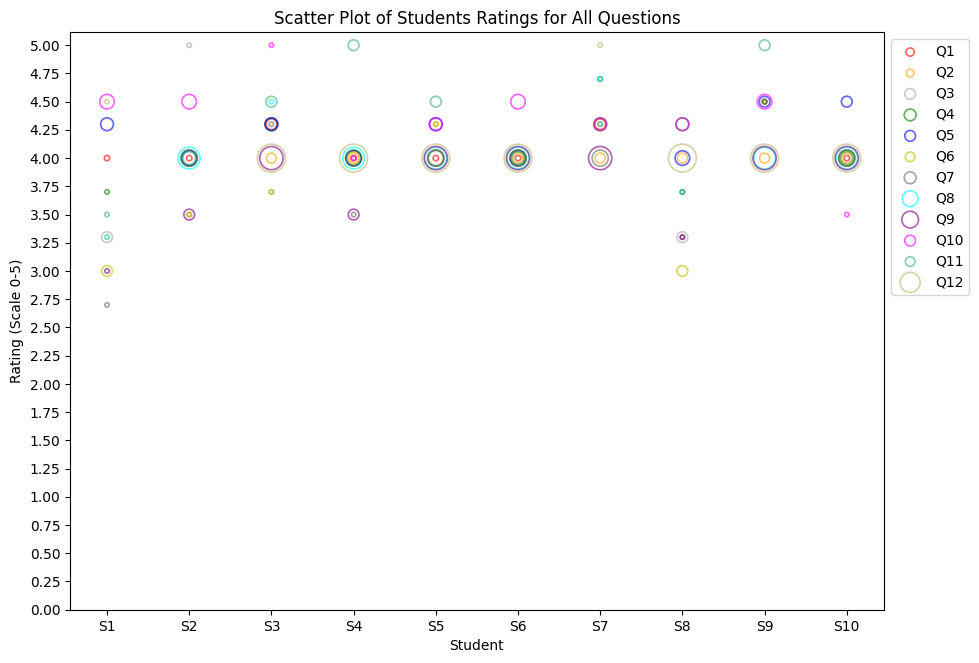

In [120]:
# creating function to place a specific color for a question
def question_color(ques_column_name):
    # dictionary that assigns a color for a specific question
    color_dict = {
        'Q1': 'red', 'Q2': 'orange', 'Q3': 'darkgray', 'Q4': 'green', 'Q5': 'blue', 
        'Q6': 'y', 'Q7': 'dimgray', 'Q8': 'aqua', 'Q9': 'purple', 'Q10': 'magenta',
        'Q11': 'mediumseagreen', 'Q12': 'darkkhaki',
    }
    # returns the color associated with a given question
    # If the ques_column_name exists in color_dict, it returns the corresponding color, if it does not exist then returns black
    return color_dict.get(ques_column_name, 'black')  

# creating a fuction to get the size of a datapoint based on frequency
def get_point_size_based_on_frequency(student, question, data):
    # The rating for the given student for a particular question is retrieved from the dataset
    student_rating = data.loc[data['Student'] == student, question].values[0]
    # Calculate the frequency of this rating for the specific question
    frequency = sum(data[question] == student_rating)

    # Define the size increments
    base_size = 10
    size_increment = 25

    # Manually setting the size for datapoints depending on if the datapoints are stacked or not
    if frequency == 1: # if the frequency is 1 (it means no other points are stacked on top of each other) set the size to 10 
        return base_size
    elif frequency == 2:
        return base_size + 2 * size_increment
    elif frequency == 3:
        return base_size + 3 * size_increment
    elif frequency == 4:
        return base_size + 4 * size_increment
    elif frequency == 5:
        return base_size + 5 * size_increment
    else:
        # sizes_dict[question] retrieves the base size for the given question from the sizes_dict dictionary.
        # (frequency - 1) calculate how much the size should increase beyond the base size. If the frequency is 1, frequency - 1 is 0, 
        # so there is no increment. For higher frequencies, it determines the number of increments.
        # 0.1 * (frequency - 1) multiplies the adjusted frequency (frequency - 1) by a constant factor (0.1). 
        # This factor represents the rate at which the size increases relative to the base size.
        # 1 + 0.1 * (frequency - 1) adds 1 to the proportional increase to get the multiplier. This multiplier scales the base size according to the frequency.
        return sizes_dict[question] * (1 + 0.1 * (frequency - 1)) # Increase the size with frequency
    

# setting up size of the plot
plt.figure(figsize=(10.5, 7.5))
# for a rating given a particular question in the columns of student_data starting from the second column and continuing until the last column
# the first column is ignored because it contains the students
for question in student_data.columns[1:]:
    # student_data['Student'] retrieves the 'Student' column from the student_data dataset. This column contains the identifiers for each student
    # for student in student_data['Student' iterates over each student identifier in the 'Student' column
    # get_point_size_based_on_frequency(student, question, student_data, sizes_dict) is a function call within the List Comprehension
    # So, For each student in student_data['Student'], it calls the get_point_size_based_on_frequency 
    sizes = [get_point_size_based_on_frequency(student, question, student_data) for student in student_data['Student']]
    # Creating a scatter plot for each question
    sns.scatterplot(x=student_data['Student'], y=question, data=student_data, edgecolor=question_color(question), facecolor='none', 
                    s=sizes, label=question, alpha=0.6, linewidth=1.25)

# setting major ticks for y-axis
plt.yticks([0.00, 0.25, 0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 2.00, 2.25, 2.50, 2.75, 3.00, 3.25, 3.50, 3.75, 4.00, 4.25, 4.50, 4.75, 5.00], ['0.00', '0.25', '0.50', '0.75', '1.00', '1.25', '1.50', '1.75', '2.00', '2.25', '2.50', '2.75', '3.00', '3.25', '3.50', '3.75', '4.00', '4.25', '4.50', '4.75', '5.00'])

# Add labels and title
plt.xlabel('Student')
plt.ylabel('Rating (Scale 0-5)')
plt.title('Scatter Plot of Students Ratings for All Questions')

# Adjusting legend
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

plt.show()